In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Importing Necessasary libraries

In [3]:
import pandas as pd
import numpy as np

# Importing plotting libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Train and test Split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#Building decision tree
from sklearn.tree import DecisionTreeClassifier

# Library for buiding RandomForest Classifier
from sklearn.ensemble import RandomForestClassifier

#Importing metrics and accuracy
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

#Importing metrics for data imabalce
from imblearn.over_sampling import SMOTE

#supressing warnings
import warnings
warnings.filterwarnings("ignore")

# Loading Dataset and Initial insepection of the dataset

In [4]:
inp0 = pd.read_csv('/kaggle/input/banking-dataset-marketing-targets/train.csv', sep=';', low_memory=True)
inp0.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
#Examine the shape
inp0.shape

(45211, 17)

The dataset consists of a total of 45,211 observations and 17 features.

In [6]:
# More detailed summary of the dataset
inp0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


* The dataset contains 45,211 entries for every feature, confirming there are no missing values.* 
According to the output of the info() method, 7 features are of integer type, while the remaining 10 are of object datatype
The dataset utilizes 5.9 MB of memory.

In [7]:
#Checking for duplicate observations
inp0.duplicated().sum()

0

There are not duplicate observations pesent in the dataset

In [8]:
#Examine the Descriprtive statistica Summary
inp0.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,45211.0,NaN,NaN,NaN,40.93621,10.618762,18.0,33.0,39.0,48.0,95.0
job,45211,12,blue-collar,9732,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marital,45211,3,married,27214,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,45211,4,secondary,23202,NaN,NaN,NaN,NaN,NaN,NaN,NaN
default,45211,2,no,44396,NaN,NaN,NaN,NaN,NaN,NaN,NaN
balance,45211.0,NaN,NaN,NaN,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
housing,45211,2,yes,25130,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan,45211,2,no,37967,NaN,NaN,NaN,NaN,NaN,NaN,NaN
contact,45211,3,cellular,29285,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day,45211.0,NaN,NaN,NaN,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0


In [9]:
# Decsrie Age variable
inp0.age.describe()

count    45211.000000
mean        40.936210
std         10.618762
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

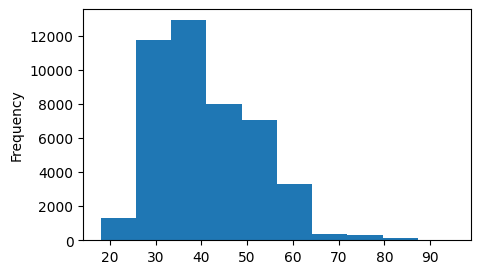

In [10]:
# Plot histogram
plt.figure(figsize=(5,3))
inp0.age.plot.hist()
plt.show()

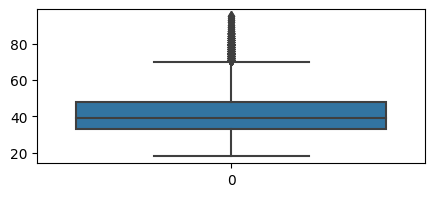

In [11]:
#plot the boxplot of age variable.
plt.figure(figsize=(5,2))
sns.boxplot(inp0.age)
plt.show()

In [12]:
# Describe Salary feature
inp0.balance.describe()

count     45211.000000
mean       1362.272058
std        3044.765829
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64

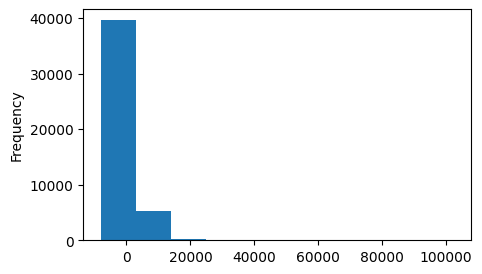

In [13]:
# Plot histogram
plt.figure(figsize=(5,3))
inp0.balance.plot.hist()
plt.show()

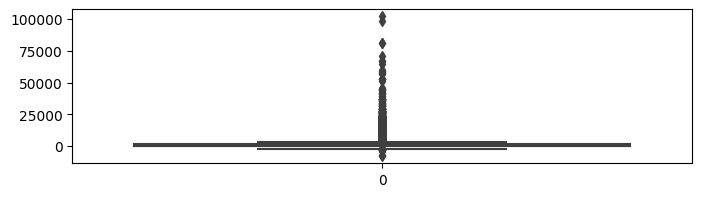

In [14]:
#plot the boxplot of balance variable.
plt.figure(figsize=[8,2])
sns.boxplot(inp0.balance)
plt.show()

In [15]:
inp0.duration.head(10)

0    261
1    151
2     76
3     92
4    198
5    139
6    217
7    380
8     50
9     55
Name: duration, dtype: int64

In [16]:
#describe the duration variable
inp0.duration.describe()

count    45211.000000
mean       258.163080
std        257.527812
min          0.000000
25%        103.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64

# Univariate Analysis

In [17]:
# calcualte the percentage of each marital status category. 
inp0.marital.value_counts(normalize=True)*100

marital
married     60.193316
single      28.289576
divorced    11.517109
Name: proportion, dtype: float64

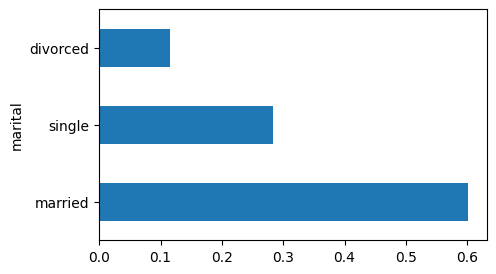

In [18]:
#plot the bar graph of percentage marital status categories
plt.figure(figsize=(5,3))
inp0.marital.value_counts(normalize=True).plot.barh()
plt.show()

In [19]:
# calcualte the percentage of each Job category. 
inp0.job.value_counts(normalize=True)*100

job
blue-collar      21.525735
management       20.919688
technician       16.803433
admin.           11.437482
services          9.188029
retired           5.007631
self-employed     3.492513
entrepreneur      3.289023
unemployed        2.882042
housemaid         2.742695
student           2.074716
unknown           0.637013
Name: proportion, dtype: float64

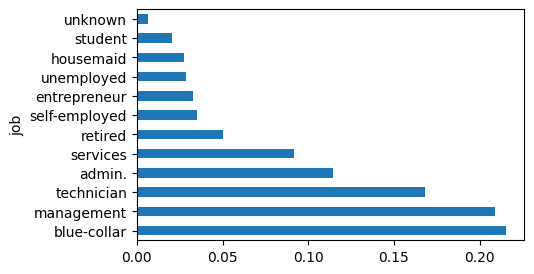

In [20]:
#plot the bar graph of percentage marital status categories
plt.figure(figsize=(5,3))
inp0.job.value_counts(normalize=True).plot.barh()
plt.show()

In [21]:
#calculate the percentage of each Education category.
inp0.education.value_counts(normalize=True)*100

education
secondary    51.319369
tertiary     29.419831
primary      15.153392
unknown       4.107407
Name: proportion, dtype: float64

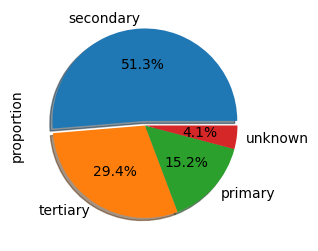

In [22]:
plt.figure(figsize=(5,3))
inp0.education.value_counts(normalize=True).plot.pie(explode=[0.05,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()

In [23]:
#calculate the percentage of each poutcode category.
inp0.poutcome.value_counts(normalize=True)*100

poutcome
unknown    81.747805
failure    10.840282
other       4.069806
success     3.342107
Name: proportion, dtype: float64

In [24]:
inp0[-(inp0.poutcome=="unknown")].poutcome.value_counts(normalize=True)*100

poutcome
failure    59.391663
other      22.297625
success    18.310713
Name: proportion, dtype: float64

<Axes: ylabel='proportion'>

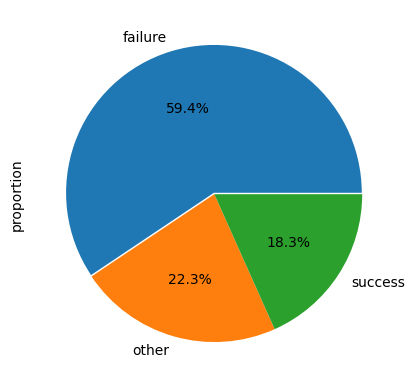

In [25]:
inp0[-(inp0.poutcome=="unknown")].poutcome.value_counts(normalize=True).plot.pie(explode=[0.01,0,0],autopct='%1.1f%%')

In [26]:
#calculate the percentage of each category.
inp0.y.value_counts()

y
no     39922
yes     5289
Name: count, dtype: int64

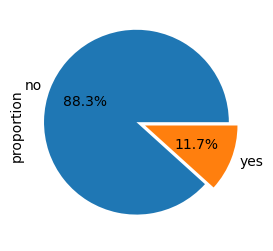

In [27]:
#plot the pie chart of response categories
plt.figure(figsize=(5,3))
inp0.y.value_counts(normalize= True).plot.pie(explode=[0.1,0],autopct='%1.1f%%')
plt.show()

# Bivariate and Multivariate Analysis

<Figure size 300x200 with 0 Axes>

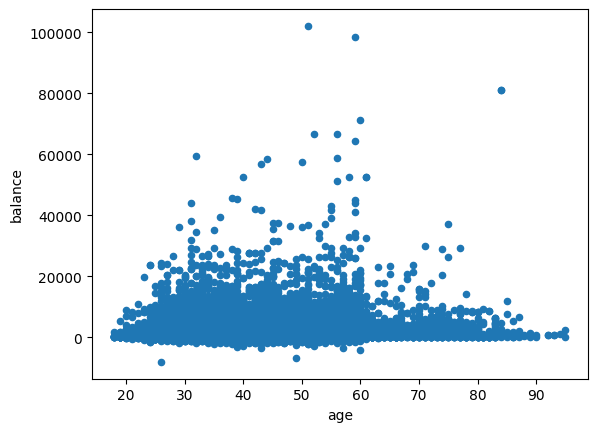

In [28]:
#plot the scatter plot of balance and age variable in inp0
plt.figure(figsize=(3,2))
inp0.plot.scatter(x='age', y='balance')
plt.show()

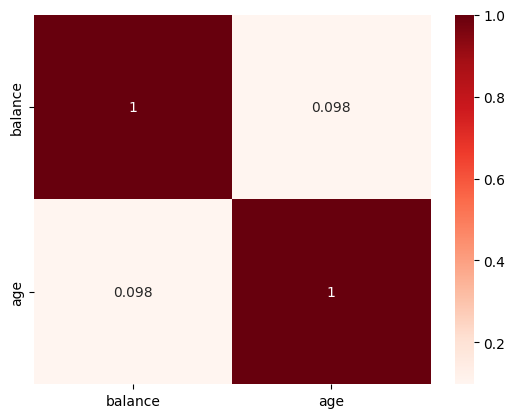

In [29]:
#plot the correlation matrix of balance and age in inp1 dataframe.
sns.heatmap( inp0[["balance", "age"]].corr(), annot= True, cmap= "Reds")
plt.show()

In [30]:
#groupby the target find the mean of the balance with response no & yes seperatly.
inp0.groupby("y")["balance"].mean()

y
no     1303.714969
yes    1804.267915
Name: balance, dtype: float64

In [31]:
#groupby the target find the meadian of the balance with response no & yes seperatly.
inp0.groupby("y")["balance"].median()

y
no     417.0
yes    733.0
Name: balance, dtype: float64

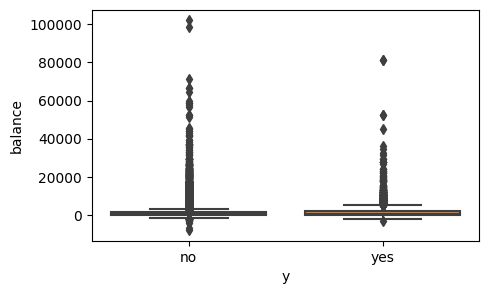

In [32]:
#plot the box plot of salary for yes & no responses.
plt.figure(figsize=(5,3))
sns.boxplot(data=inp0,x="y", y="balance")
plt.show()

In [33]:
#create target_flag of numerical data type where response "yes"= 1, "no"= 0
inp0["target_flag"]=np.where(inp0.y=="yes", 1, 0)
inp0.y.value_counts()

y
no     39922
yes     5289
Name: count, dtype: int64

In [ ]:
inp0.target_flag.mean()

In [34]:
#calculate the mean of target_flag with different education categories.
inp0.groupby("education")['target_flag'].mean()

education
primary      0.086265
secondary    0.105594
tertiary     0.150064
unknown      0.135703
Name: target_flag, dtype: float64

In [35]:
inp0.groupby("marital")["target_flag"].mean()

marital
divorced    0.119455
married     0.101235
single      0.149492
Name: target_flag, dtype: float64

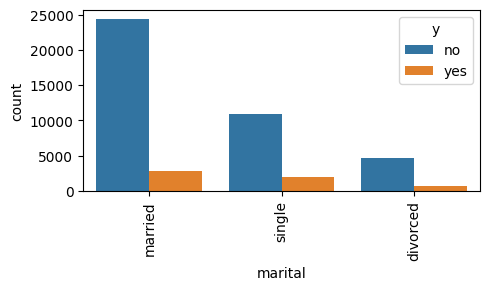

In [36]:
plt.figure(figsize=(5,3))
sns.countplot(data = inp0,x="marital",hue="y")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [37]:
inp0.groupby("marital")["y"].value_counts()

marital   y  
divorced  no      4585
          yes      622
married   no     24459
          yes     2755
single    no     10878
          yes     1912
Name: count, dtype: int64

In [38]:
inp0.groupby("housing")["target_flag"].mean()

housing
no     0.167024
yes    0.077000
Name: target_flag, dtype: float64

In [39]:
inp0.groupby("loan")["target_flag"].mean()

loan
no     0.126557
yes    0.066814
Name: target_flag, dtype: float64

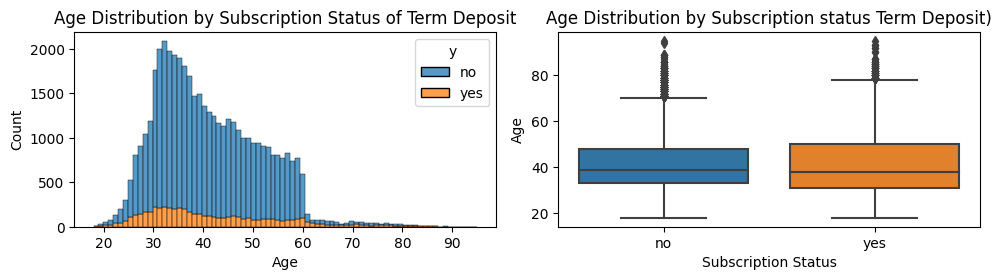

In [40]:
plt.figure(figsize=(10, 5))

plt.subplot(2, 2, 1)
sns.histplot(data=inp0, x='age', bins=95-18+1, hue='y', multiple='stack')
plt.title('Age Distribution by Subscription Status of Term Deposit')
plt.xlabel('Age')
plt.ylabel('Count')

plt.subplot(2, 2, 2)
sns.boxplot(data=inp0, x='y', y='age')
plt.title('Age Distribution by Subscription status Term Deposit)')
plt.xlabel('Subscription Status')
plt.ylabel('Age')

plt.tight_layout()
plt.show()

In [41]:
#create the buckets of <30, 30-40, 40-50 50-60 and 60+ from age column.
pd.cut(inp0.age[:5],[0, 30, 40, 50, 60, 9999], labels= ["<30","30-40","40-50","50-60", "60+"])

0    50-60
1    40-50
2    30-40
3    40-50
4    30-40
Name: age, dtype: category
Categories (5, object): ['<30' < '30-40' < '40-50' < '50-60' < '60+']

In [42]:
inp0["age_group"]=pd.cut(inp0.age,[0, 30, 40, 50, 60, 9999], labels= ["<30","30-40","40-50","50-60", "60+"])
inp0.age_group.value_counts(normalize= True)*100

age_group
30-40    39.121010
40-50    24.858994
50-60    17.843003
<30      15.549313
60+       2.627679
Name: proportion, dtype: float64

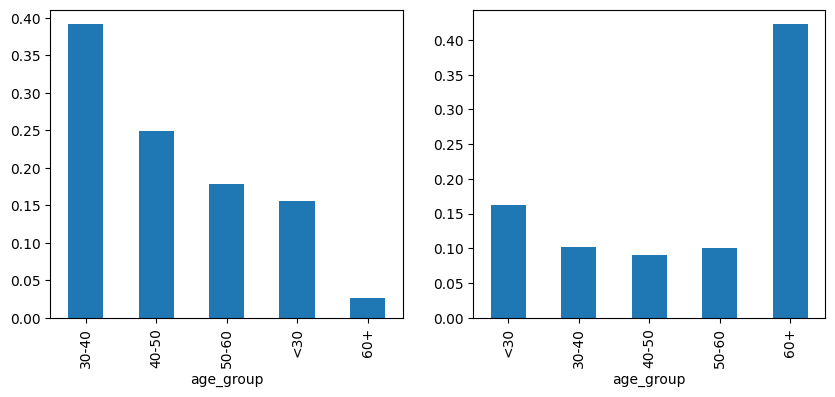

In [43]:
#plot the percentage of each buckets and average values of response_flag in each buckets. plot in subplots.
plt.figure(figsize=[10,4])
plt.subplot(1, 2, 1)
inp0.age_group.value_counts(normalize= True).plot.bar()
plt.subplot(1, 2, 2)
inp0.groupby(['age_group'])['target_flag'].mean().plot.bar()
plt.show()

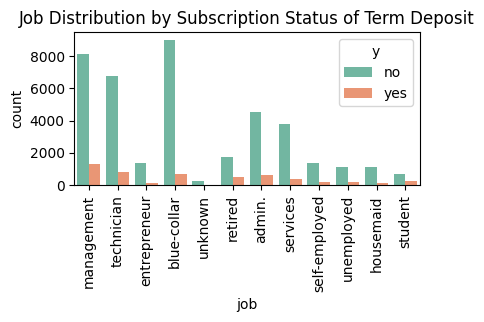

In [44]:
plt.figure(figsize=(8, 5))

plt.subplot(2, 2, 1)
sns.countplot(data=inp0,x="job",hue="y",palette='Set2')
plt.title("Job Distribution by Subscription Status of Term Deposit")
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

In [45]:
inp0.groupby("job")["y"].value_counts()

job            y  
admin.         no     4540
               yes     631
blue-collar    no     9024
               yes     708
entrepreneur   no     1364
               yes     123
housemaid      no     1131
               yes     109
management     no     8157
               yes    1301
retired        no     1748
               yes     516
self-employed  no     1392
               yes     187
services       no     3785
               yes     369
student        no      669
               yes     269
technician     no     6757
               yes     840
unemployed     no     1101
               yes     202
unknown        no      254
               yes      34
Name: count, dtype: int64

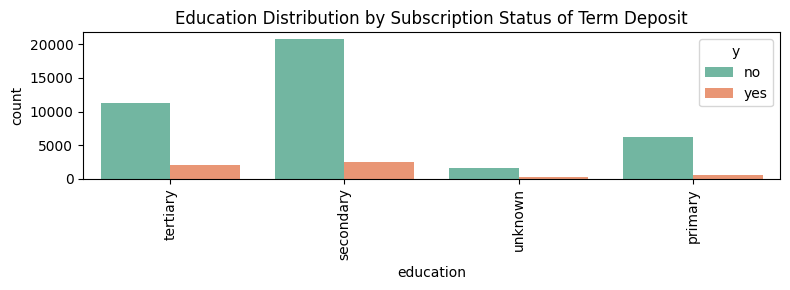

In [46]:
plt.figure(figsize=(8,3))
sns.countplot(data=inp0,x="education",hue='y',palette="Set2")
plt.title("Education Distribution by Subscription Status of Term Deposit")
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

In [47]:
inp0.groupby("education")["y"].value_counts()

education  y  
primary    no      6260
           yes      591
secondary  no     20752
           yes     2450
tertiary   no     11305
           yes     1996
unknown    no      1605
           yes      252
Name: count, dtype: int64

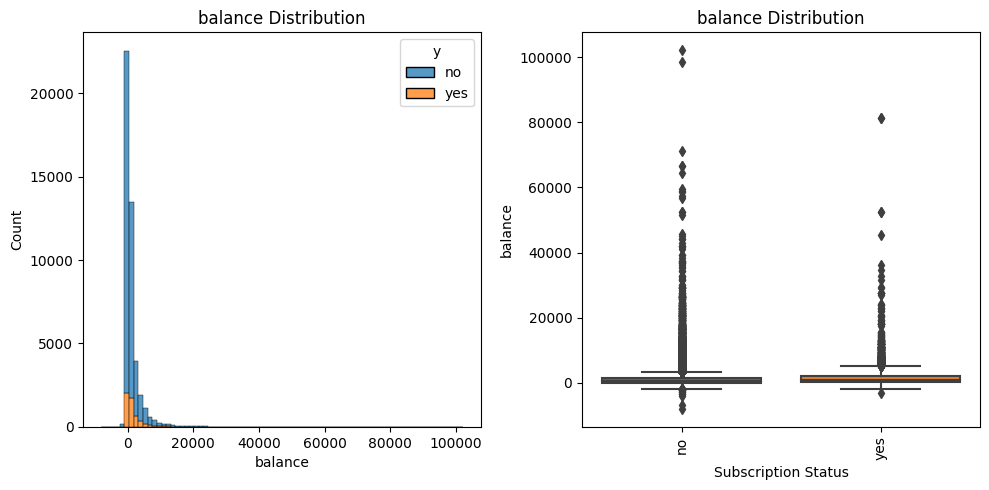

In [48]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.histplot(data=inp0, x='balance', bins=95-18+1, hue='y', multiple='stack')
plt.title('balance Distribution')
plt.xlabel('balance')
plt.ylabel('Count')


plt.subplot(1, 2, 2)
sns.boxplot(data=inp0, x='y', y='balance')
plt.title('balance Distribution')
plt.xlabel('Subscription Status')
plt.ylabel('balance')

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

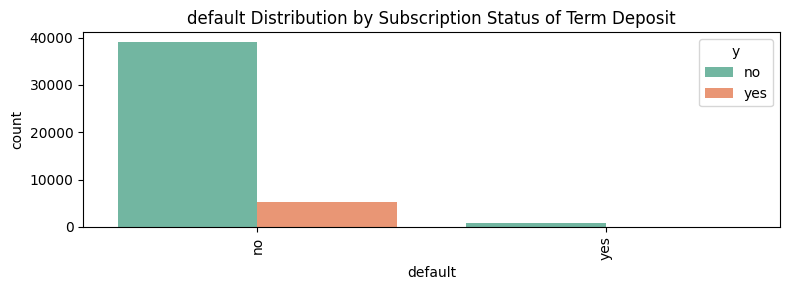

In [49]:
plt.figure(figsize=(8,3))
sns.countplot(data=inp0,x="default",hue='y',palette="Set2")
plt.title("default Distribution by Subscription Status of Term Deposit")
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

In [50]:
inp0.groupby("default")["y"].value_counts()

default  y  
no       no     39159
         yes     5237
yes      no       763
         yes       52
Name: count, dtype: int64

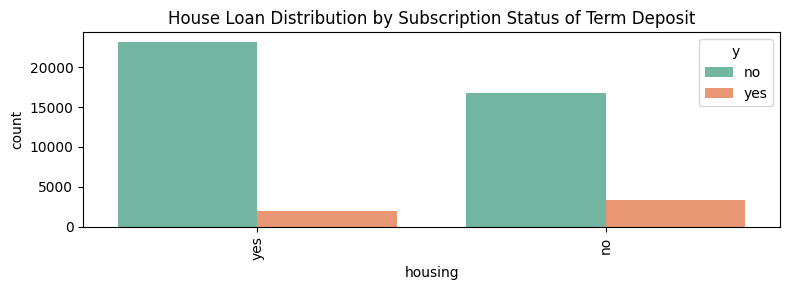

In [51]:
plt.figure(figsize=(8,3))
sns.countplot(data=inp0,x="housing",hue='y',palette="Set2")
plt.title("House Loan Distribution by Subscription Status of Term Deposit")
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

In [52]:
inp0.groupby("housing")["y"].value_counts()

housing  y  
no       no     16727
         yes     3354
yes      no     23195
         yes     1935
Name: count, dtype: int64

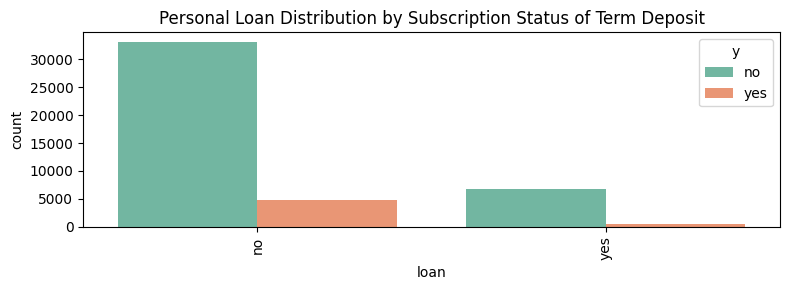

In [53]:
plt.figure(figsize=(8,3))
sns.countplot(data=inp0,x="loan",hue='y',palette="Set2")
plt.title("Personal Loan Distribution by Subscription Status of Term Deposit")
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

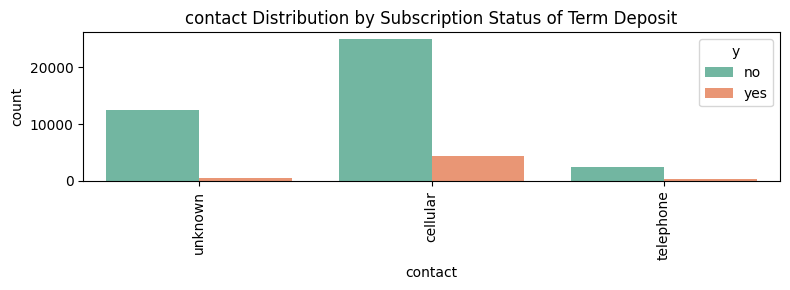

In [54]:
plt.figure(figsize=(8,3))
sns.countplot(data=inp0,x="contact",hue='y',palette="Set2")
plt.title("contact Distribution by Subscription Status of Term Deposit")
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

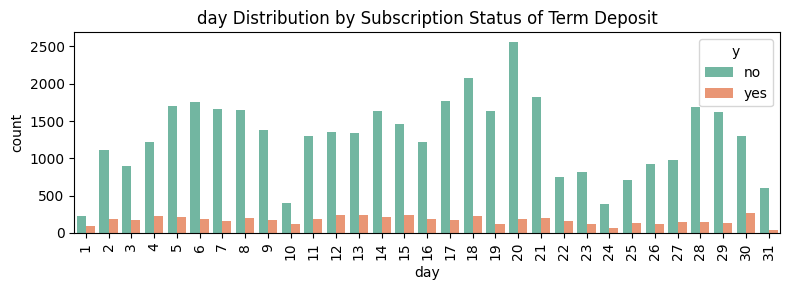

In [55]:
plt.figure(figsize=(8,3))
sns.countplot(data=inp0,x="day",hue='y',palette="Set2")
plt.title("day Distribution by Subscription Status of Term Deposit")
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

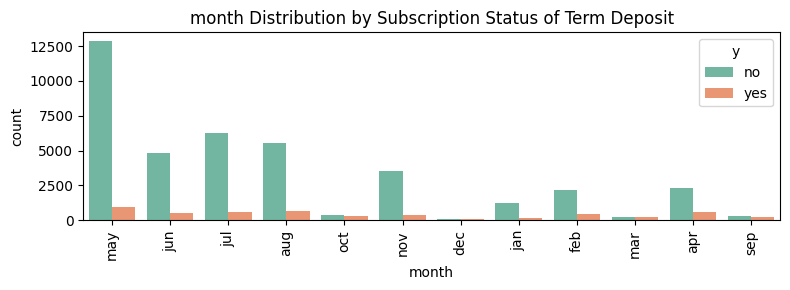

In [56]:
plt.figure(figsize=(8,3))
sns.countplot(data=inp0,x="month",hue='y',palette="Set2")
plt.title("month Distribution by Subscription Status of Term Deposit")
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Count')

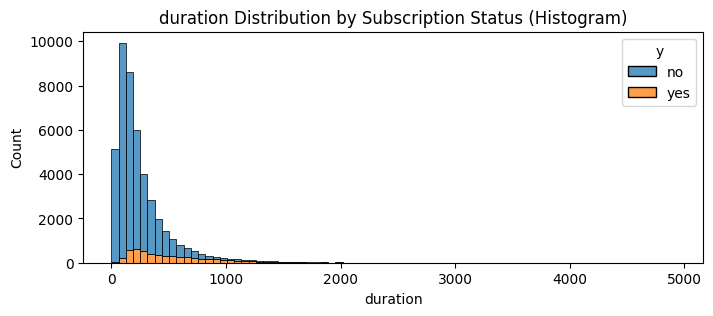

In [57]:
plt.figure(figsize=(8,3))
sns.histplot(data=inp0, x='duration', bins=95-18+1, hue='y', multiple='stack')
plt.title('duration Distribution by Subscription Status (Histogram)')
plt.xlabel('duration')
plt.ylabel('Count')

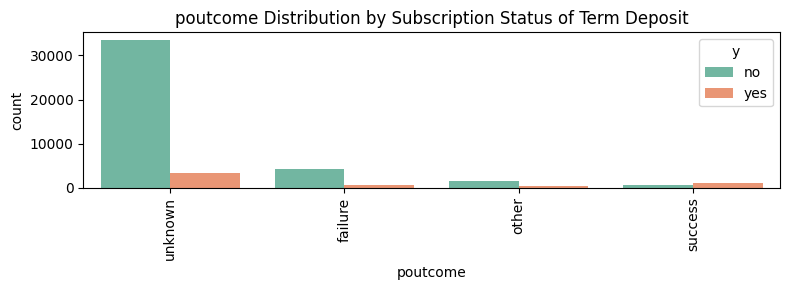

In [58]:
plt.figure(figsize=(8,3))
sns.countplot(data=inp0,x="poutcome",hue='y',palette="Set2")
plt.title("poutcome Distribution by Subscription Status of Term Deposit")
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

****PreProcessing****

In [59]:
inp0.drop(['target_flag','age_group'],inplace=True,axis=1)

In [61]:
inp0['month'] = inp0['month'].replace({"jan": 1, "feb": 2, "mar" :3,
                                   "apr":4 ,"may": 5, "jun":6,
                                   "jul":7 , "aug":8, "sep": 9,
                                   "oct": 10, "nov": 11 , "dec":12})

In [62]:
# Encoding Categorical features
inp0 = pd.get_dummies(inp0,columns=['job','marital','education','contact','poutcome'],
                      drop_first=True,dtype=int)
inp0.head()

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown
0,58,no,2143,yes,no,5,5,261,1,-1,...,1,0,0,1,0,0,1,0,0,1
1,44,no,29,yes,no,5,5,151,1,-1,...,0,1,1,0,0,0,1,0,0,1
2,33,no,2,yes,yes,5,5,76,1,-1,...,1,0,1,0,0,0,1,0,0,1
3,47,no,1506,yes,no,5,5,92,1,-1,...,1,0,0,0,1,0,1,0,0,1
4,33,no,1,no,no,5,5,198,1,-1,...,0,1,0,0,1,0,1,0,0,1


In [63]:
Categorical_columns = inp0.select_dtypes("O").columns
Categorical_columns

Index(['default', 'housing', 'loan', 'y'], dtype='object')

In [64]:
numerical_columns = inp0.select_dtypes("number").columns
numerical_columns

Index(['age', 'balance', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'education_secondary',
       'education_tertiary', 'education_unknown', 'contact_telephone',
       'contact_unknown', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown'],
      dtype='object')

In [66]:
#Encoding  Categorical Columns
inp0['default'] = inp0['default'].replace({"yes": 1 , "no": 0})
inp0['housing'] = inp0['housing'].replace({"yes": 1 , "no": 0})
inp0['loan'] = inp0['loan'].replace({"yes": 1 , "no": 0})
inp0['y'] = inp0['y'].replace({"yes": 1 , "no": 0})

In [67]:
inp0.head()

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,2143,1,0,5,5,261,1,-1,...,1,0,0,1,0,0,1,0,0,1
1,44,0,29,1,0,5,5,151,1,-1,...,0,1,1,0,0,0,1,0,0,1
2,33,0,2,1,1,5,5,76,1,-1,...,1,0,1,0,0,0,1,0,0,1
3,47,0,1506,1,0,5,5,92,1,-1,...,1,0,0,0,1,0,1,0,0,1
4,33,0,1,0,0,5,5,198,1,-1,...,0,1,0,0,1,0,1,0,0,1


In [68]:
inp0['y'].value_counts()

y
0    39922
1     5289
Name: count, dtype: int64

# ****Balancing Dataset by using SMOTE**** 

In [69]:
# separating features (X) and target (y)
X = inp0.drop('y',axis=1)
y = inp0['y']

# Apply SMOTE to the features
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X,y)

# create new balnced data set
inp1 = pd.concat([X_resampled,y_resampled],axis=1)

#Check the class distribution in the balanced dataset
inp1['y'].value_counts()

y
0    39922
1    39922
Name: count, dtype: int64

In [70]:
# Checking for duplciates
inp1.duplicated().sum()

1010

In [71]:
# Dupliated observations
inp1[inp1.duplicated()]

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,marital_single,education_secondary,education_tertiary,education_unknown,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown,y
45665,34,0,172,0,0,9,6,769,3,-1,...,0,1,0,0,0,0,0,0,1,1
45722,61,0,6,1,0,13,10,215,1,182,...,0,0,1,0,0,0,0,1,0,1
46533,28,0,721,0,0,21,4,628,1,-1,...,0,0,0,0,0,0,0,0,1,1
46763,53,0,0,0,0,15,10,133,2,91,...,0,0,1,0,0,0,0,1,0,1
46843,33,0,801,0,0,7,5,683,1,-1,...,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79809,26,0,2522,0,0,26,7,415,1,-1,...,0,0,1,0,0,0,0,0,1,1
79813,49,0,709,1,0,9,6,1252,3,-1,...,0,1,0,0,0,0,0,0,1,1
79818,34,0,143,1,0,11,5,670,1,-1,...,0,0,0,0,0,1,0,0,1,1
79819,42,0,4754,0,0,22,7,711,5,-1,...,0,0,0,0,0,0,0,0,1,1


In [72]:
#Removing dupplicates
inp1.drop_duplicates(inplace=True)
inp1.duplicated().sum()

0

In [ ]:
#Check the class distribution in the balanced dataset
inp1['y'].value_counts()

# Scaling features except the target feature

In [73]:
scaler = StandardScaler()

for col in inp1.select_dtypes(include=['number']).columns:
    if col != 'y':
        inp1[col] = scaler.fit_transform(inp1[[col]])
        
inp1.head()

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,marital_single,education_secondary,education_tertiary,education_unknown,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown,y
0,1.562304,-0.105144,0.184005,1.260238,-0.328629,-1.318711,-0.439054,-0.330625,-0.525759,-0.489021,...,-0.539391,-0.790998,1.801961,-0.160093,-0.204483,2.179282,-0.167042,-0.256374,0.606986,0
1,0.281370,-0.105144,-0.479061,1.260238,-0.328629,-1.318711,-0.439054,-0.648255,-0.525759,-0.489021,...,1.853942,1.264226,-0.554951,-0.160093,-0.204483,2.179282,-0.167042,-0.256374,0.606986,0
2,-0.725077,-0.105144,-0.487529,1.260238,3.042943,-1.318711,-0.439054,-0.864821,-0.525759,-0.489021,...,-0.539391,1.264226,-0.554951,-0.160093,-0.204483,2.179282,-0.167042,-0.256374,0.606986,0
3,0.555856,-0.105144,-0.015793,1.260238,-0.328629,-1.318711,-0.439054,-0.818620,-0.525759,-0.489021,...,-0.539391,-0.790998,-0.554951,6.246380,-0.204483,2.179282,-0.167042,-0.256374,0.606986,0
4,-0.725077,-0.105144,-0.487843,-0.793501,-0.328629,-1.318711,-0.439054,-0.512541,-0.525759,-0.489021,...,1.853942,-0.790998,-0.554951,6.246380,-0.204483,2.179282,-0.167042,-0.256374,0.606986,0


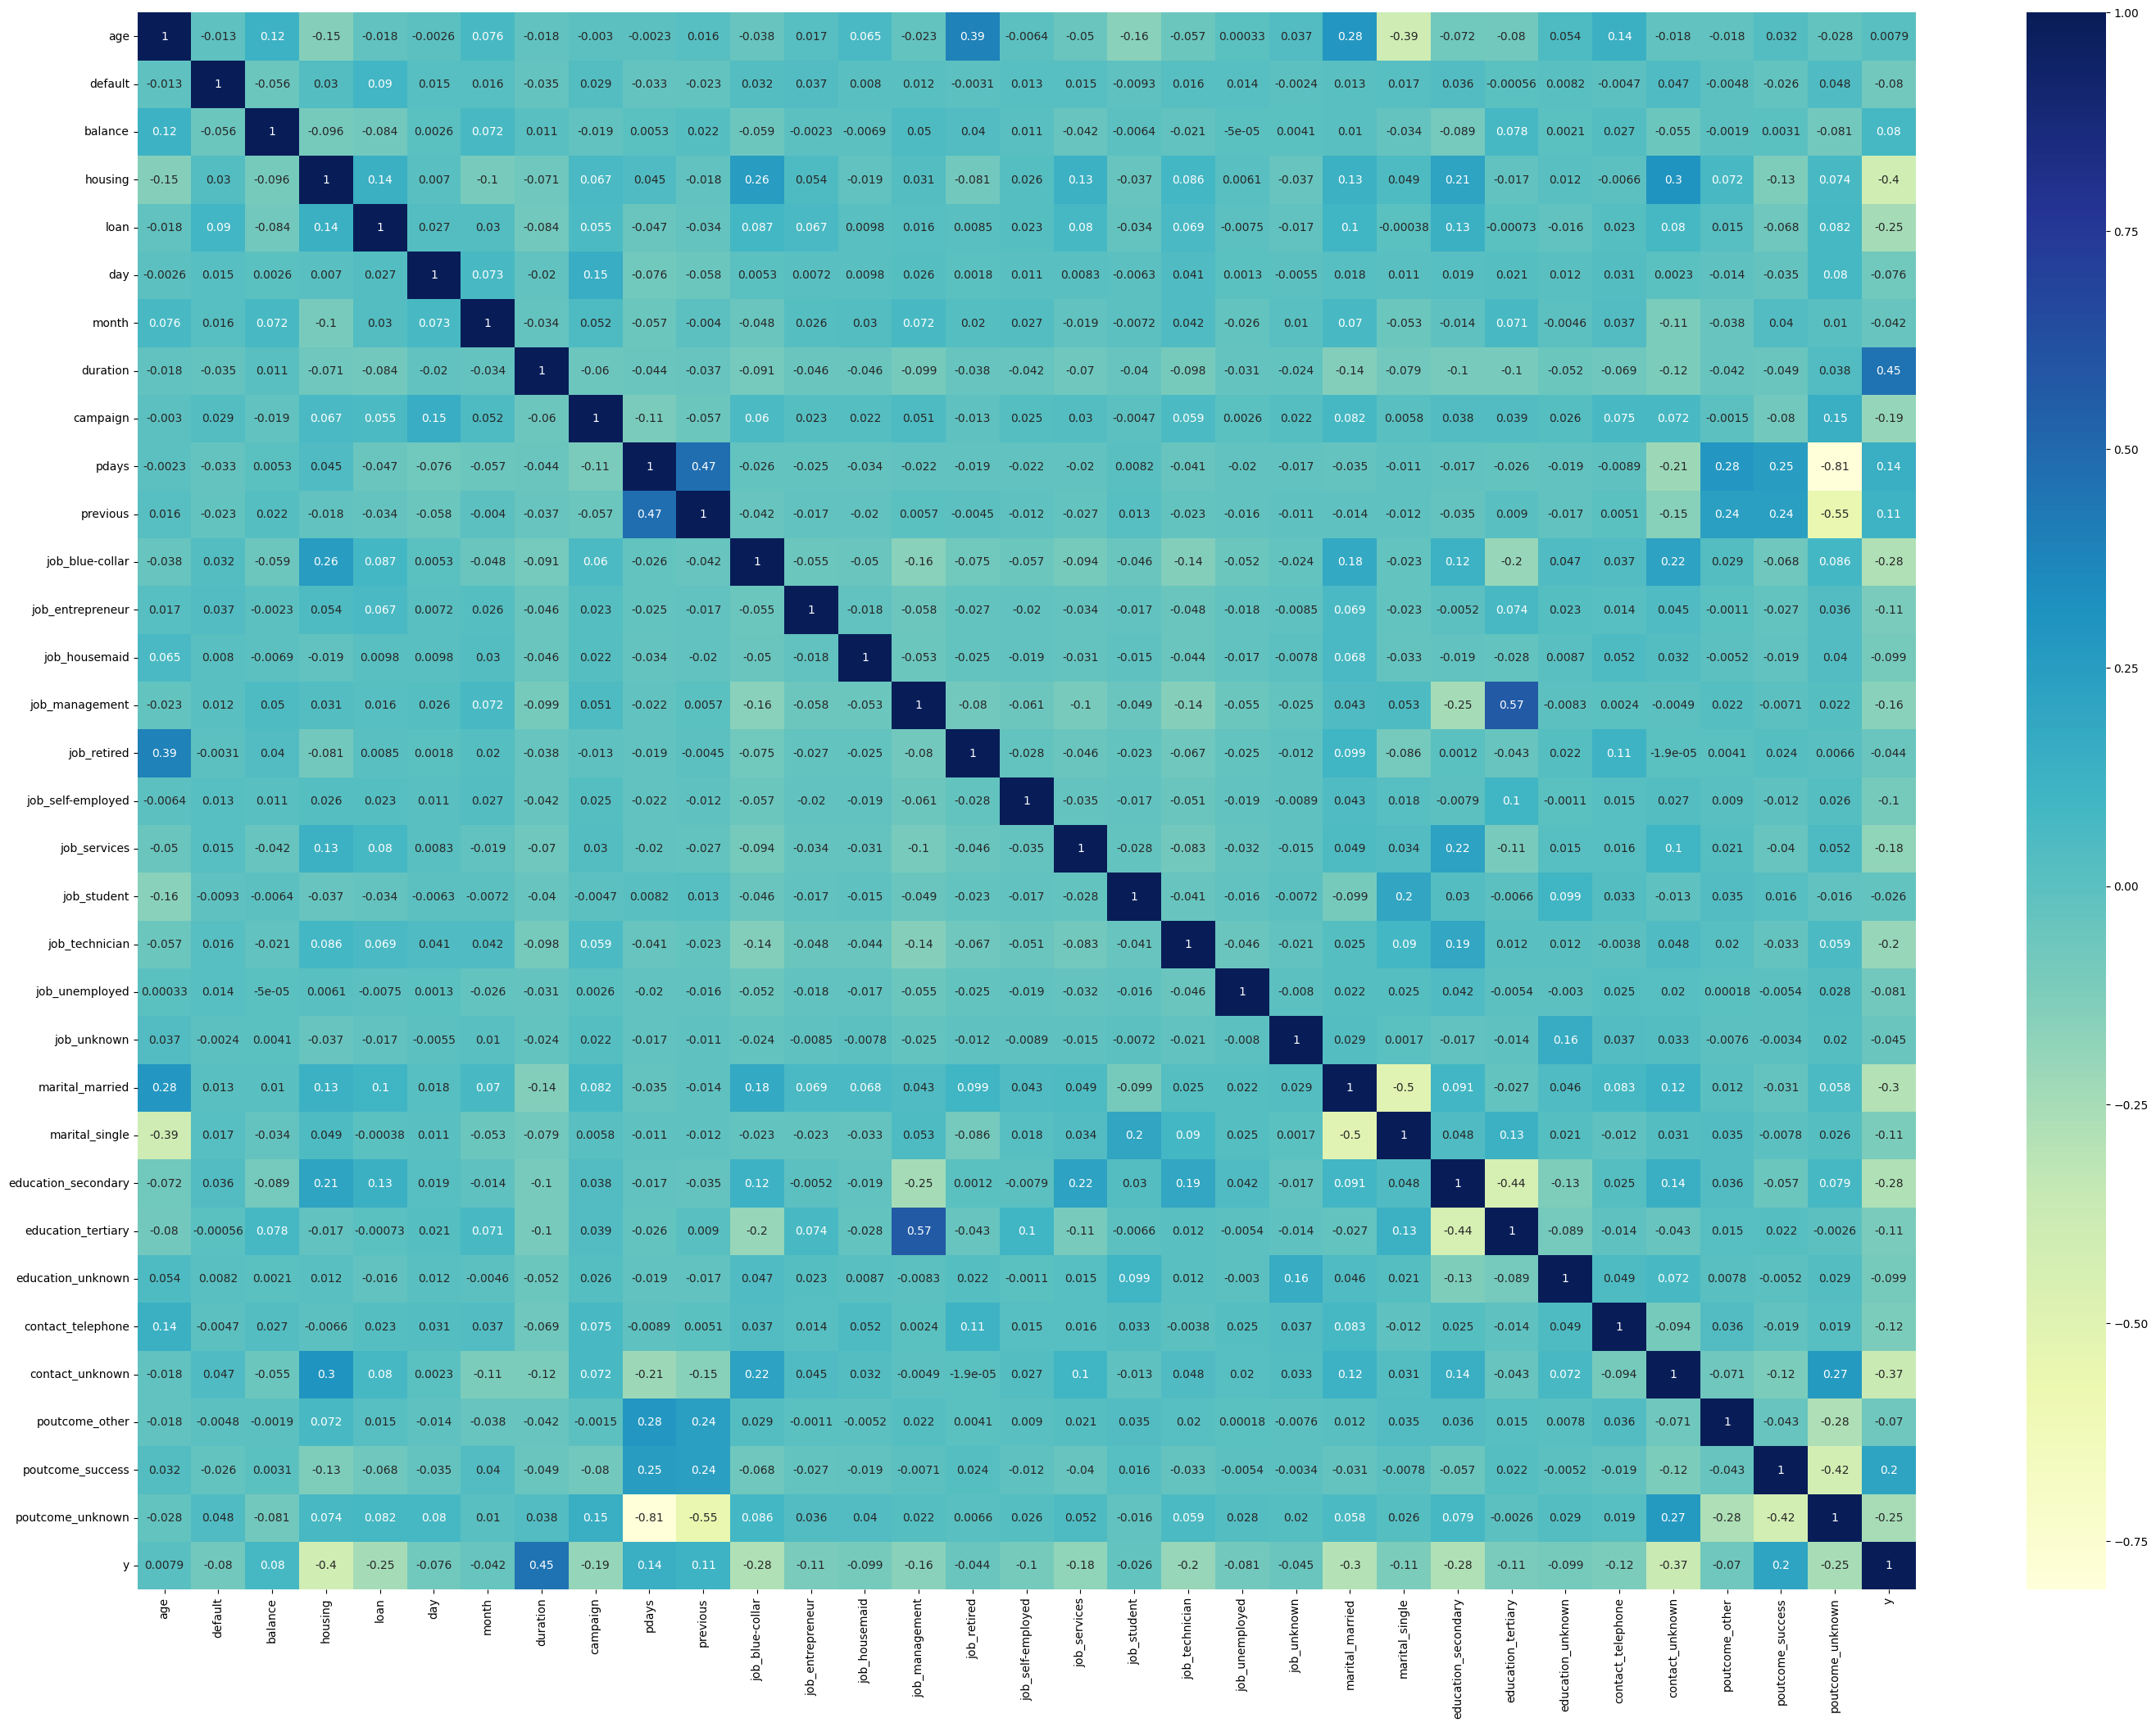

In [74]:
plt.figure(figsize = (35, 25))
sns.heatmap(inp1.corr(), annot = True, cmap="YlGnBu")
plt.show()

# ****Model Building and Evalaution****

In [75]:
# Assuming X represents your features and y represents your target variable
X = inp1.drop("y",axis=1)
y = inp1["y"]
print(X.shape)
print(y.shape)

(78834, 32)
(78834,)


In [76]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
print("XTrain set Shape:",X_train.shape)
print("yTrain set Shape:",y_train.shape)
print("XTest  set Shape:",X_test.shape)
print("yTest  set Shape:",y_test.shape)

XTrain set Shape: (63067, 32)
yTrain set Shape: (63067,)
XTest  set Shape: (15767, 32)
yTest  set Shape: (15767,)


# *Decision Tree Alogorithm instituation*

# Building Decision Tree classification using Gini criteria

In [77]:
# Defining Model
dt_gini = DecisionTreeClassifier(criterion="gini",max_depth=3)

#Fitting Model
dt_gini.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

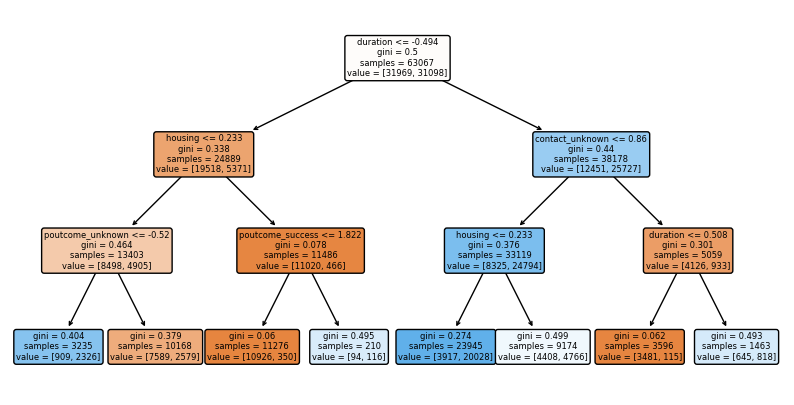

In [78]:
from sklearn import tree
plt.figure(figsize=(10,5))  
_ = tree.plot_tree(dt_gini, feature_names = X_train.columns, 
             filled=True, fontsize=6, rounded = True)
plt.show()

#### *Measuring Test Accuracy*

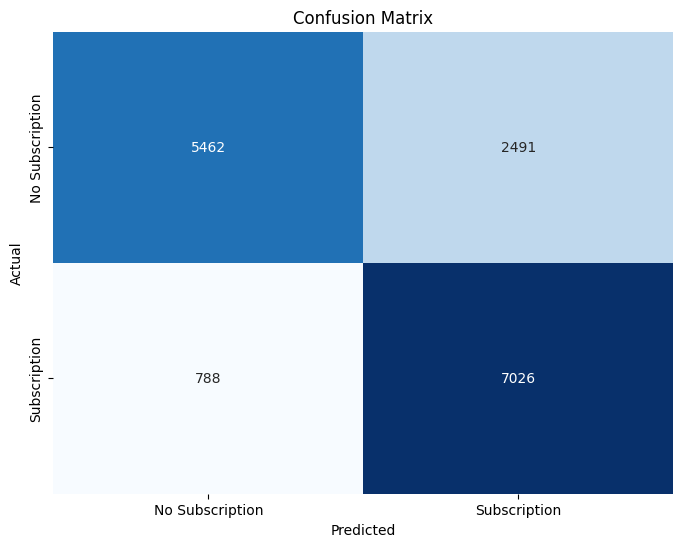

In [79]:
# Prediction
y_pred = dt_gini.predict(X_test)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Subscription', 'Subscription'], yticklabels=['No Subscription', 'Subscription'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [80]:
# Classification Report for test set
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.69      0.77      7953
           1       0.74      0.90      0.81      7814

    accuracy                           0.79     15767
   macro avg       0.81      0.79      0.79     15767
weighted avg       0.81      0.79      0.79     15767



Precision, Recall, F1-Score, and Support:
Precision: This metric indicates the proportion of true positives among all positive predictions. For class 0, the precision is 0.87, and for class 1, it's 0.74. This means that when the model predicts class 0, it's correct 87% of the time, and for class 1, it's correct 74% of the time.

Recall: This metric shows the proportion of true positives correctly identified by the model out of all actual positives. For class 0, recall is 0.69, and for class 1, it's 0.90. This indicates that 69% of actual class 0 instances were correctly identified, and 90% of actual class 1 instances were correctly identified.

F1-Score: This is the harmonic mean of precision and recall, providing a balance between the two. The F1-score for class 0 is 0.77, and for class 1, it's 0.81, showing that class 1 is slightly better predicted overall.

Support: This indicates the number of actual occurrences of each class in the dataset. There are 7,953 instances of class 0 and 7,814 instances of class 1.

Accuracy: This is the overall proportion of correct predictions (both true positives and true negatives) out of all predictions. The accuracy of your model is 0.79, meaning it correctly classifies 79% of the instances.
Decision model with Gini entropy Your model has an overall accuracy of 79%, and it performs slightly better on class 1 (with higher recall and F1-score) compared to class 0. The precision and recall for both classes suggest that the model is relatively balanced in its performance, but there is room for improvement, particularly in recall for class 0.

#### *Check for overfitting and underfitting*

In [81]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(dt_gini.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(dt_gini.score(X_test, y_test)))

Training set score: 0.7936
Test set score: 0.7920


Model appears to be performing well on both the training set and the test set, indicating good generalization. The scores are close to each other, which suggests that the model is not overfitting or underfitting.

In machine learning, overfitting occurs when a model learns the training data too well, including the noise and outliers, which can reduce its performance on unseen data. On the other hand, underfitting occurs when the model is too simple to capture the underlying patterns in the data.

With a small difference between the training and test scores (0.7936 and 0.7920, respectively), it seems like model strikes a good balance.

# Building Decision Tree classification using Entropy criteria

In [82]:
# Defining Model
dt_entropy = DecisionTreeClassifier(criterion="entropy",max_depth=3)

#Fitting Model
dt_entropy.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

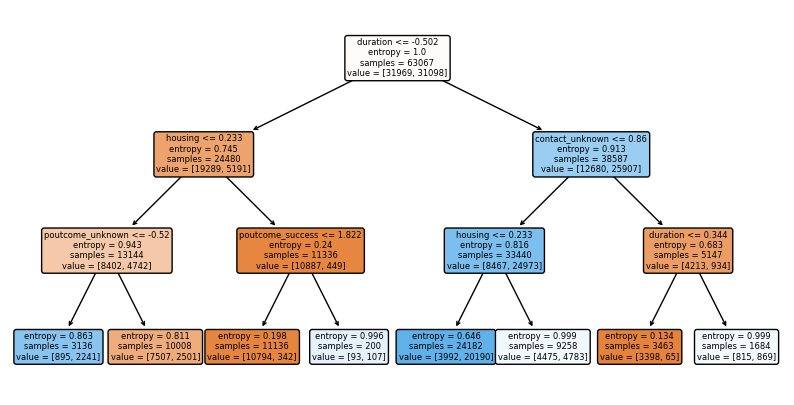

In [83]:
plt.figure(figsize=(10,5))
_ = tree.plot_tree(dt_entropy,feature_names=X_train.columns,filled=True, fontsize=6, rounded = True)
plt.show()

#### Measuring Test Accuracy

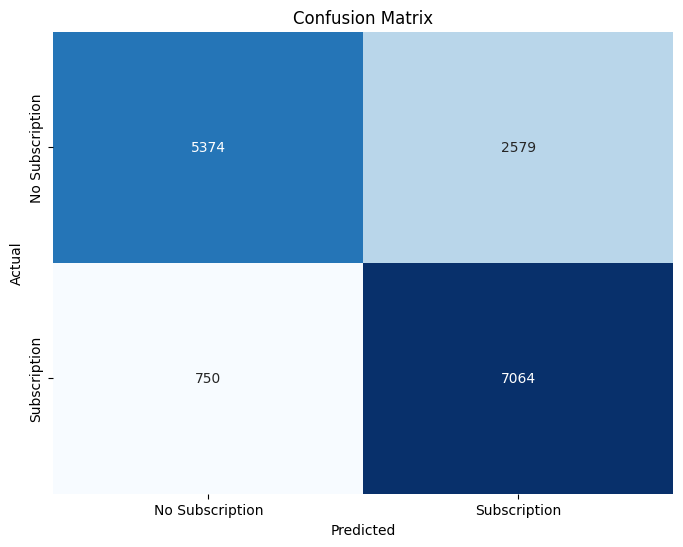

In [84]:
# Prediction
y_pred = dt_entropy.predict(X_test)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Subscription', 'Subscription'], yticklabels=['No Subscription', 'Subscription'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [85]:
#Classification Report for test set
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.68      0.76      7953
           1       0.73      0.90      0.81      7814

    accuracy                           0.79     15767
   macro avg       0.81      0.79      0.79     15767
weighted avg       0.81      0.79      0.79     15767



1.Precision: This is the ratio of true positive predictions to the total number of positive predictions made by the model. For class 0, precision is 0.88, and for class 1, it's 0.73. This means that when the model predicts class 0, it's correct 88% of the time, and when it predicts class 1, it's correct 73% of the time.

2.Recall: This is the ratio of true positive predictions to the actual number of positives in the dataset. For class 0, recall is 0.68, and for class 1, it's 0.90. This means that 68% of actual class 0 instances were correctly identified, while 90% of actual class 1 instances were correctly identified.

3.F1-Score: This metric balances precision and recall, providing a single score that takes both into account. For class 0, the F1-score is 0.76, and for class 1, it's 0.81, indicating better overall performance for class 1.

4.Support: This is the number of actual instances for each class in the dataset. There are 7,953 instances of class 0 and 7,814 instances of class 1.

Accuracy: The overall accuracy of the model is 0.79, meaning the model correctly classifies 79% of the instances in the dataset.

Summary: Model shows an overall accuracy of 79%, with better precision but lower recall for class 0 compared to class 1. Class 1 is predicted more accurately overall, as indicated by its higher F1-score. The model seems to perform reasonably well, but there is a slight imbalance in recall between the classes.

#### Check for overfitting and underfitting

In [86]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(dt_entropy.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(dt_entropy.score(X_test, y_test)))

Training set score: 0.7910
Test set score: 0.7889


Training Set Score: 0.7910 Test Set Score : 0.7889

DT model with Entropty appears to be performing consistently on both the training and test sets, with the scores being very close to each other. This indicates that the model is generalizing well and is neither overfitting nor underfitting. Here's a brief analysis:

Training Set Score (0.7910): This score reflects how well your model performs on the training data, with 79.10% of the predictions being correct.

Test Set Score (0.7889): This score reflects your model's performance on unseen data, with 78.89% of the predictions being correct.

The small difference between the training and test scores suggests that the model is robust and performs well on new data, maintaining similar accuracy.

In summary, decision tree model using entropy as a criterion seems to be well-tuned and balanced, providing a reliable performance across both the training and test datasets.

# Building Decision Tree classification with Optimal Paramters for Parameters throguh Gridsearch

In [87]:
from sklearn.model_selection import GridSearchCV

#Defining hyperparameters

tuned_parameters = {"criterion":['gini','entropy'],
                    "max_depth":range(1,10),
                    "min_samples_split":range(1,10),
                    "min_samples_leaf":range(1,5)}

# Invoking Decision Tree
decision_tree = DecisionTreeClassifier()

gridcv = GridSearchCV(decision_tree,
                      param_grid =tuned_parameters,
                      cv = 5,
                      verbose = 1,
                      n_jobs = 1,
                      scoring = 'roc_auc')

# fitting on X_train and y_train
gridcv.fit(X_train,y_train)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(1, 10)},
             scoring='roc_auc', verbose=1)

### Finding best hyperparameter

In [88]:
gridcv.best_params_

{'criterion': 'entropy',
 'max_depth': 9,
 'min_samples_leaf': 4,
 'min_samples_split': 8}

In [89]:
gridcv.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_leaf=4,
                       min_samples_split=8)

In [90]:
gridcv.best_score_

0.9457501067417095

#### Model Fitting with best paramaters

Accuracy Score : 0.89


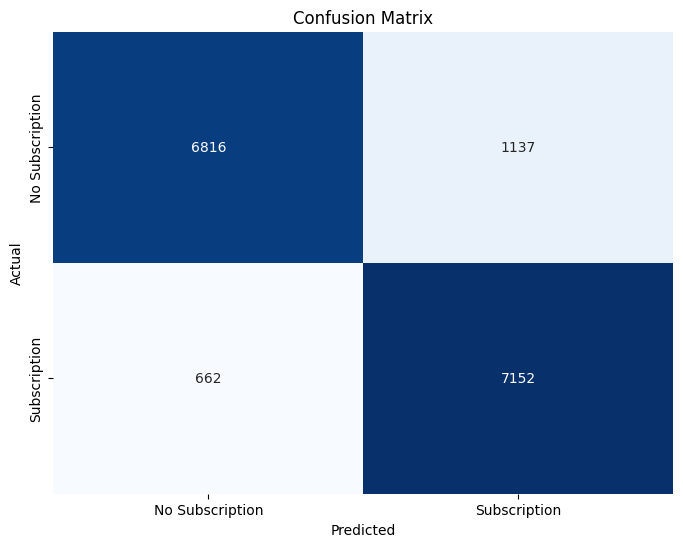

In [91]:
# Train the model with best estomators
best_estimator_dt = gridcv.best_estimator_
best_estimator_dt.fit(X_train,y_train)

# Make prediction on the best estimator
y_pred = best_estimator_dt.predict(X_test)

print(f'Accuracy Score : {accuracy_score(y_test,y_pred):.2f}')

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Subscription', 'Subscription'], yticklabels=['No Subscription', 'Subscription'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [92]:
#Classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.86      0.88      7953
           1       0.86      0.92      0.89      7814

    accuracy                           0.89     15767
   macro avg       0.89      0.89      0.89     15767
weighted avg       0.89      0.89      0.89     15767



**Precision, Recall, F1-Score, and Support:

Precision: This metric tells you the proportion of true positive predictions among all positive predictions. For class 0, the precision is 0.91, and for class 1, it's 0.86. This indicates that the model is quite accurate when predicting both classes.

Recall: This measures the proportion of true positives identified out of all actual positives. For class 0, the recall is 0.86, and for class 1, it's 0.91. This suggests that the model is able to correctly identify a high percentage of actual instances for both classes.

F1-Score: The F1-score is the harmonic mean of precision and recall, balancing the two. For class 0, the F1-score is 0.88, and for class 1, it's 0.89, showing strong performance in predicting both classes.

Support: This indicates the number of actual instances in each class. There are 7,953 instances of class 0 and 7,814 instances of class 1 in the dataset.

Accuracy: The overall accuracy of your model is 0.89, meaning the model correctly classifies 89% of the instances.

Macro Average: This is the unweighted average of precision, recall, and F1-score across both classes. The macro average precision, recall, and F1-score are all 0.89, indicating consistent performance across both classes.

Weighted Average: This average is weighted by the number of instances in each class. The weighted average precision, recall, and F1-score are all 0.89, suggesting balanced performance taking into account the class distribution.

Summary: Your model achieves an overall accuracy of 89%, with high precision, recall, and F1-scores for both classes, indicating that it performs very well in distinguishing between the two classes. The slightly higher F1-score for class 1 shows that the model may be slightly better at predicting this class. However, the overall performance metrics suggest a robust and well-performing model.

In [93]:
# Checking overfillting and undefitting print the scores on training and test set

print('Training set score: {:.4f}'.format(best_estimator_dt.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(best_estimator_dt.score(X_test, y_test)))

Training set score: 0.8999
Test set score: 0.8859


Training Set Score: 0.8999 Test Set Score: 0.8856

This model seems to be performing quite well on both the training and test sets, as indicated by these scores. Here’s a quick analysis:

Training Set Score (0.8999): This score reflects how well your model performs on the training data, with approximately 89.99% of the predictions being correct.

Test Set Score (0.8856): This score indicates the model’s performance on unseen data, with approximately 88.56% of the predictions being correct.

The scores are fairly close, suggesting that the model generalizes well and avoids significant overfitting or underfitting. A small difference between the training and test set scores indicates that the model maintains similar accuracy on new data, implying robustness and reliability in its predictions.

In summary, this model shows strong performance with high accuracy on both the training and test datasets. This indicates that your model is well-tuned and effective in making predictions.